In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. قراءة البيانات
file_path = "cleaned_Attack_file.xlsx"  # غيّري المسار حسب مكان الملف عندك
df = pd.read_excel(file_path)

# الأعمدة الخاصة بأنواع الهجوم
attack_cols = [
    'Spam', 'Ransomware', 'Local Infection', 'Exploit', 'Malicious Mail',
    'Network Attack', 'On Demand Scan', 'Web Threat'
]

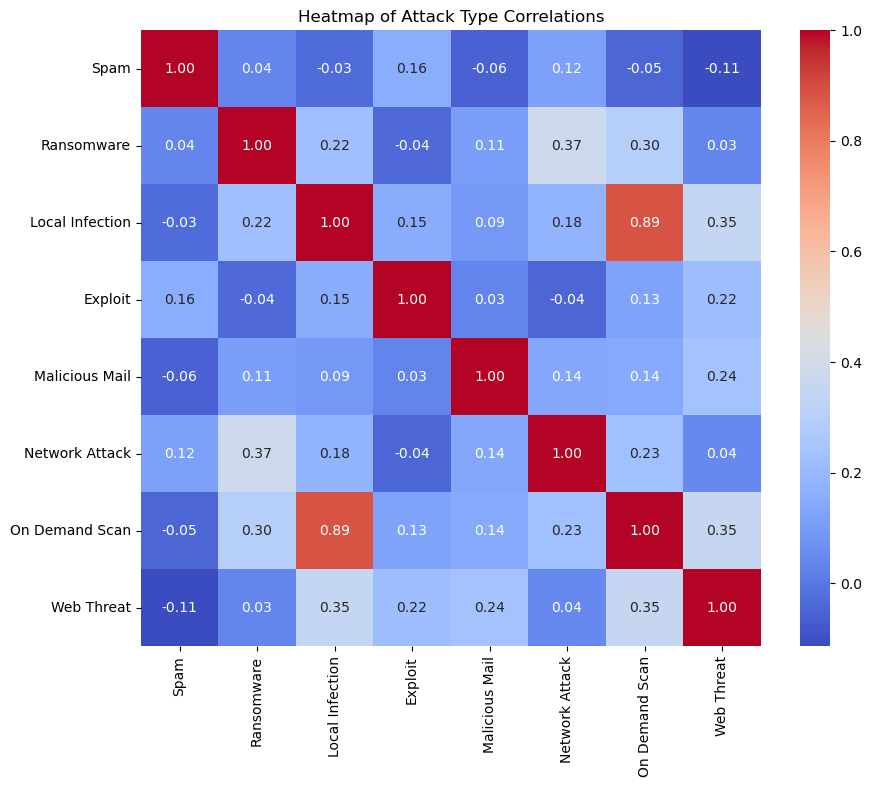

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[attack_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Attack Type Correlations")
plt.show()

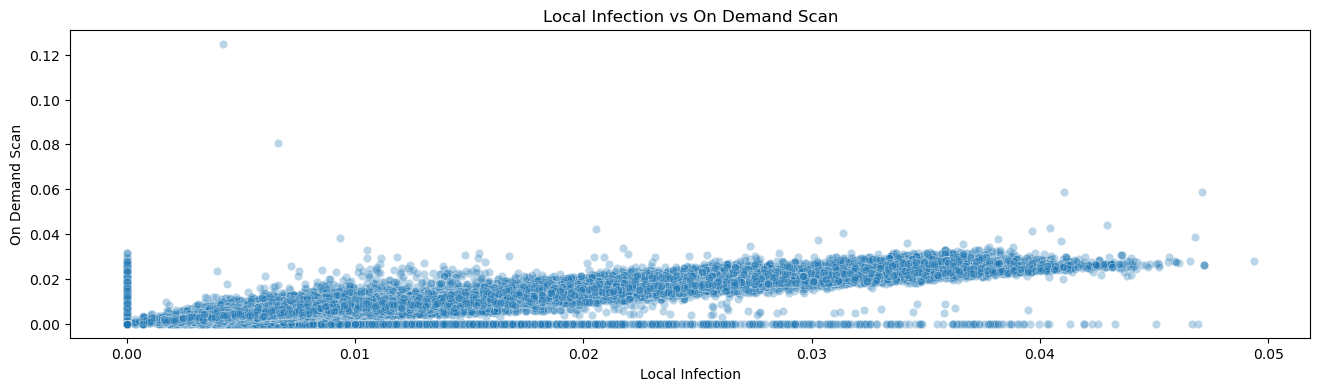

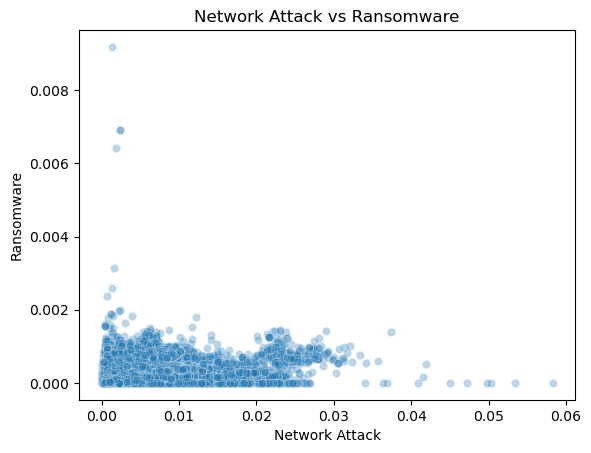

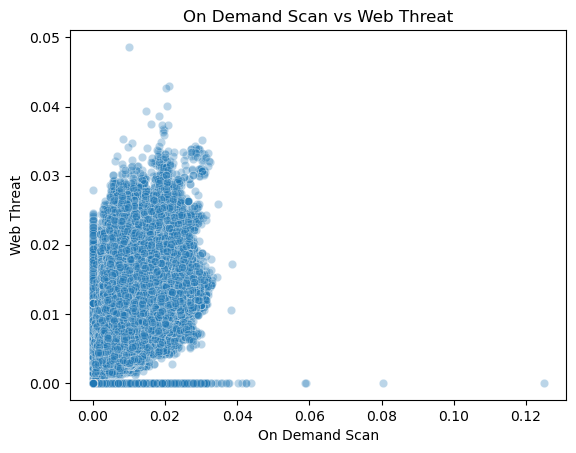

In [4]:
plt.figure(figsize=(16, 4))
sns.scatterplot(data=df, x='Local Infection', y='On Demand Scan', alpha=0.3)
plt.title('Local Infection vs On Demand Scan')
plt.show()

sns.scatterplot(data=df, x='Network Attack', y='Ransomware', alpha=0.3)
plt.title('Network Attack vs Ransomware')
plt.show()

sns.scatterplot(data=df, x='On Demand Scan', y='Web Threat', alpha=0.3)
plt.title('On Demand Scan vs Web Threat')
plt.show()

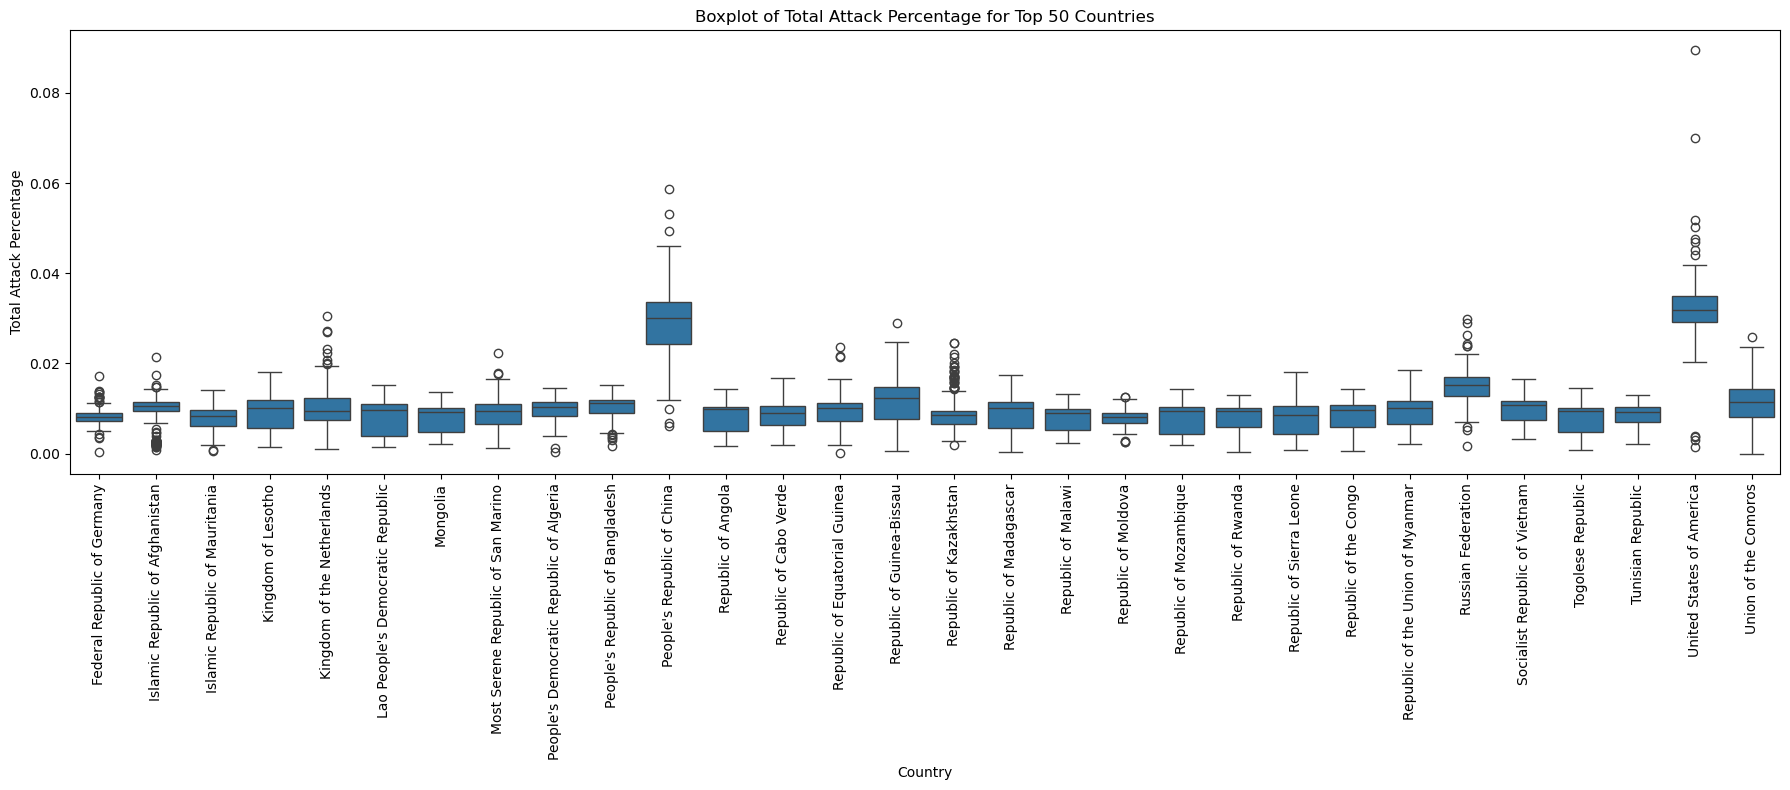

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# نحسب المتوسط لكل بلد ونختار أعلى 50 بلد
top_50_countries = (
    df.groupby("Country")["Total_Attack_Percentage"]
    .mean()
    .sort_values(ascending=False)
    .head(30)
    .index
)

# فلترة البيانات لعرض الـ 50 بلد بس
filtered_df = df[df["Country"].isin(top_50_countries)]

# رسم Box Plot
plt.figure(figsize=(18, 8))
sns.boxplot(data=filtered_df, x="Country", y="Total_Attack_Percentage")

plt.xticks(rotation=90)
plt.title("Boxplot of Total Attack Percentage for Top 50 Countries")
plt.ylabel("Total Attack Percentage")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


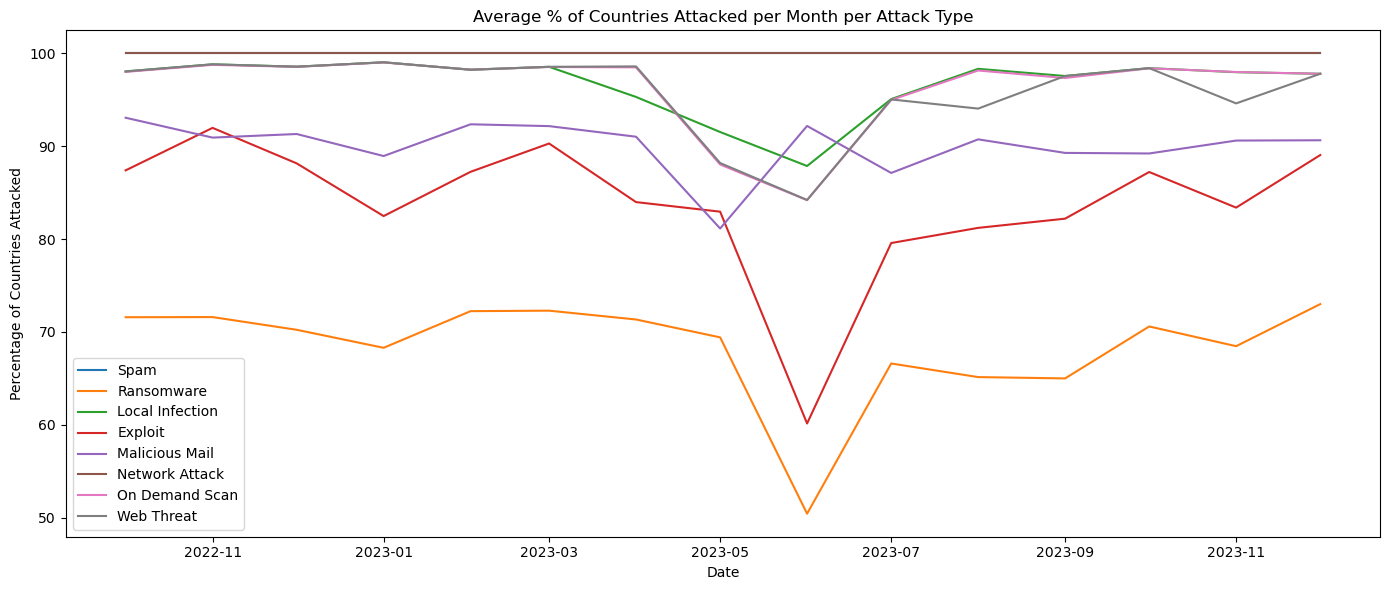

In [9]:
# تحويل التاريخ
df['AttackDate'] = pd.to_datetime(df['AttackDate'])
df['Date'] = df['AttackDate'].dt.to_period('M').dt.to_timestamp()

# نحسب متوسط (نسبة) البلدان التي كان فيها كل نوع هجوم != 0 لكل شهر
non_zero_avg = df.groupby('Date')[attack_cols].apply(lambda x: (x > 0).mean())

# رسم Line chart لكل نوع هجوم عبر الزمن (بـ النسبة المئوية)
plt.figure(figsize=(14, 6))
for col in attack_cols:
    plt.plot(non_zero_avg.index, non_zero_avg[col] * 100, label=col)  # *100 علشان تبقى نسبة مئوية

plt.title("Average % of Countries Attacked per Month per Attack Type")
plt.xlabel("Date")
plt.ylabel("Percentage of Countries Attacked")
plt.legend()
plt.tight_layout()
plt.show()
